In [3]:
import feather
import numpy as np 
import pandas as pd
from sklearn.preprocessing import (OneHotEncoder,StandardScaler)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV)

In [4]:
from sklearn.compose import ColumnTransformer

In [5]:
#Modelos a utilizar:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [127]:
#walmart_anterior= feather.read_dataframe('feathers/walmart_wide_train.feather')

In [128]:
#walmart_anterior

In [96]:
#regreso= walmart_anterior['regreso']

In [99]:
#variedad= walmart_anterior['variedad']

In [113]:
#walmart_train= feather.read_dataframe('feathers/walmart_wide_train.feather')

In [114]:
#walmart_test= feather.read_dataframe('feathers/walmart_wide_test.feather')

In [116]:
#walmart_wide_full=pd.concat([walmart_train, walmart_test], axis=1, sort=True)

In [1]:
#walmart_wide_full

In [120]:
#walmart_wide_full.sort_values(by=['visit_number'])

# Creo los features: 

In [22]:
walmart_2 = feather.read_dataframe('feathers/walmart.feather')

In [23]:
walmart_2

,trip_type,visit_number,weekday,upc,scan_count,department_description,fineline_number
0,999,5.0,Friday,6.811315e+10,-1.0,FINANCIAL SERVICES,1000
1,30,7.0,Friday,6.053882e+10,1.0,SHOES,8931
2,30,7.0,Friday,7.410811e+09,1.0,PERSONAL CARE,4504
3,26,8.0,Friday,2.238404e+09,2.0,PAINT AND ACCESSORIES,3565
4,26,8.0,Friday,2.006614e+09,2.0,PAINT AND ACCESSORIES,1017
...,...,...,...,...,...,...,...
647049,39,191346.0,Sunday,3.239000e+10,1.0,PHARMACY OTC,1118
647050,39,191346.0,Sunday,7.874205e+09,1.0,FROZEN FOODS,1752
647051,39,191346.0,Sunday,4.072000e+03,1.0,PRODUCE,4170
647052,8,191347.0,Sunday,4.190008e+09,1.0,DAIRY,1512


In [24]:
X_walmart_2 = walmart_2.drop(['trip_type'], axis=1)

In [25]:
X_walmart_2

,visit_number,weekday,upc,scan_count,department_description,fineline_number
0,5.0,Friday,6.811315e+10,-1.0,FINANCIAL SERVICES,1000
1,7.0,Friday,6.053882e+10,1.0,SHOES,8931
2,7.0,Friday,7.410811e+09,1.0,PERSONAL CARE,4504
3,8.0,Friday,2.238404e+09,2.0,PAINT AND ACCESSORIES,3565
4,8.0,Friday,2.006614e+09,2.0,PAINT AND ACCESSORIES,1017
...,...,...,...,...,...,...
647049,191346.0,Sunday,3.239000e+10,1.0,PHARMACY OTC,1118
647050,191346.0,Sunday,7.874205e+09,1.0,FROZEN FOODS,1752
647051,191346.0,Sunday,4.072000e+03,1.0,PRODUCE,4170
647052,191347.0,Sunday,4.190008e+09,1.0,DAIRY,1512


In [10]:
X_walmart_2['fineline_number'].isna().sum()

4129

In [ ]:
# Reemplazo los NAS de fineline number: 

In [ ]:
## Reemplazar NAs con el valor 4822... por ser la media de farmacia, que era la que tenia NAS

In [11]:
fineline_without_nas = X_walmart_2['fineline_number'].fillna('4822', inplace=False)

In [12]:
X_walmart_2['fineline_number']= fineline_without_nas

In [13]:
X_walmart_2.isna().sum()

trip_type                    0
weekday                      0
upc                       4129
scan_count                   0
department_description       0
fineline_number              0
dtype: int64

In [ ]:
# Hago OHE con las tres columnas: 

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [15]:
#categoric_for_OHE=['weekday','department_description','fineline_number']

In [16]:
OHE=OneHotEncoder(sparse=False)

In [17]:
X_walmart_trans= X_walmart_2.drop(['upc','scan_count'],axis=1)

In [85]:
## UN PROBLEMA EN esto que estoy hciendo en que no esta teniendo ni VARIENDAD NI SCAN COUNT ni REGRESO, que antes resultaron relevantes> 

## Columnas sobre la que voy a trabajar: 

In [18]:
X_walmart_trans

,trip_type,weekday,department_description,fineline_number
0,999,Friday,FINANCIAL SERVICES,1000
1,30,Friday,SHOES,8931
2,30,Friday,PERSONAL CARE,4504
3,26,Friday,PAINT AND ACCESSORIES,3565
4,26,Friday,PAINT AND ACCESSORIES,1017
...,...,...,...,...
647049,39,Sunday,PHARMACY OTC,1118
647050,39,Sunday,FROZEN FOODS,1752
647051,39,Sunday,PRODUCE,4170
647052,8,Sunday,DAIRY,1512


In [ ]:
## agregar esto> 
#regreso= walmart_anterior['regreso']
#variedad= walmart_anterior['variedad']
#X_walmart_trans['variedad']=variedad.values

In [19]:
X_walmart_trans_ok= OHE.fit_transform(X_walmart_trans)

In [20]:
X_walmart_trans_ok

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_walmart_trans_ok.shape

(647054, 5307)

In [28]:
columns_walmart_wide= OHE.get_feature_names()
columns_walmart_wide

array(['x0_12', 'x0_14', 'x0_15', ..., 'x3_9991', 'x3_9997', 'x3_9998'],
      dtype=object)

## SPARSE MATRIX 

In [42]:
OHE_sparse=OneHotEncoder()

In [43]:
X_walmart_trans

,weekday,department_description,fineline_number
0,Friday,FINANCIAL SERVICES,1000
1,Friday,SHOES,8931
2,Friday,PERSONAL CARE,4504
3,Friday,PAINT AND ACCESSORIES,3565
4,Friday,PAINT AND ACCESSORIES,1017
...,...,...,...
647049,Sunday,PHARMACY OTC,1118
647050,Sunday,FROZEN FOODS,1752
647051,Sunday,PRODUCE,4170
647052,Sunday,DAIRY,1512


In [45]:
X_walmart_trans_sparse= OHE_sparse.fit_transform(X_walmart_trans)

In [46]:
X_walmart_trans_sparse

<647054x5269 sparse matrix of type '<class 'numpy.float64'>'
	with 1941162 stored elements in Compressed Sparse Row format>

In [68]:
columns_walmart_wide_sparse= OHE_sparse.get_feature_names()
columns_walmart_wide_sparse

(5269,)

# PANDAS WIDE WIDE 

### ESTa opcion de convertir a data frame no es lo que conviene para scikit learn: 

In [54]:
visit_number_ok= pd.DataFrame(walmart_2['visit_number'],columns=['visit_number'])

In [ ]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])

In [58]:
walmart_wide_ok= pd.DataFrame(data=X_walmart_trans_ok, index=None, columns=[columns_walmart_wide])


In [ ]:
walmart_wide_yes=pd.concat([visit_number_ok,walmart_wide_ok],axis=1)

In [ ]:
walmart_wide_ok=walmart_wide_yes.groupby(by=["visit_number"]).sum()

In [ ]:
walmart_wide_ok = walmart_wide_ok.clip(upper=1)

In [ ]:
walmart_wide_ok

In [ ]:
# Agregar trip number.... 

In [82]:
import pickle

In [ ]:
pickle.dump(walmart_wide_ok, open("pickles/walmart_wide_ok", "wb"))

In [ ]:
## Abrimos el pickle con la tabla: 
selected_var = pickle.load(open("pickles/selected_var","rb"))

In [ ]:
#Quizas no me conviene volverlo a DATA FRAMe: nos quedamos directo con esta matriz y se la pasamos al feature selection. 

In [54]:
#walmart_wide= pipeline_OHE.fit_transform(X_walmart_2) #.todense()

In [27]:
y=walmart.iloc[:,1]

In [28]:
y

0        999
1         30
2         26
3          8
4          8
        ... 
95669     25
95670     22
95671     39
95672     39
95673      8
Name: trip_type, Length: 95674, dtype: category
Categories (38, object): [3, 4, 5, 6, ..., 42, 43, 44, 999]

### Sample de la WIDE MATRIX

In [33]:
X_sample = X_walmart_trans_ok[0:20000]

In [35]:
X_sample.shape

(20000, 5269)

In [36]:
y_sample = y[0:20000]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=1)

In [82]:
X_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [19]:
# quité la estandarización porque así sale mejor la evaluación de los modelos
#pero está en otro notebook, por si acaso

## Sample de SPARSE WIDE MATRIX 

In [50]:
X_walmart_trans_sparse

<647054x5269 sparse matrix of type '<class 'numpy.float64'>'
	with 1941162 stored elements in Compressed Sparse Row format>

In [52]:
X_wide_sparse_sample= X_walmart_trans_sparse[0:20000]

# Feature selection

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [30]:
model_fs = ExtraTreesClassifier(n_estimators=500)


In [ ]:
model_fs.fit(X_train,y_train)
print(model_fs.feature_importances_)

## Feature selection Sparse Matrix: 

### sample

In [55]:
y_sample = y[0:20000]

In [56]:
from sklearn.model_selection import train_test_split

X_train_sparse, X_test_sparse, y_train_sparse, y_test_sparse = train_test_split(X_wide_sparse_sample, y_sample, random_state=1)

In [83]:
X_train_sparse

<15000x5269 sparse matrix of type '<class 'numpy.float64'>'
	with 45000 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [58]:
model_fs = ExtraTreesClassifier(n_estimators=500)


In [60]:
model_fs.fit(X_train_sparse,y_train_sparse)
print(model_fs.feature_importances_)

[0.00086152 0.         0.00086644 ... 0.         0.         0.00020175]


In [66]:
 model_fs.feature_importances_.shape

(5269,)

In [69]:
feat_importances = pd.Series(model_fs.feature_importances_, index=columns_walmart_wide_sparse)

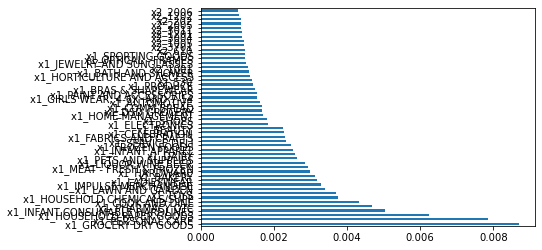

In [70]:
feat_importances.nlargest(50).plot(kind='barh')

In [71]:
feat_importances.nlargest(50)

x1_GROCERY DRY GOODS              0.008710
x1_PERSONAL CARE                  0.007863
x1_HOUSEHOLD PAPER GOODS          0.006244
x1_INFANT CONSUMABLE HARDLINES    0.005034
x1_PHARMACY OTC                   0.004688
x1_COOK AND DINE                  0.004337
x1_HOUSEHOLD CHEMICALS/SUPP       0.003750
x1_TOYS                           0.003709
x1_LAWN AND GARDEN                0.003406
x1_IMPULSE MERCHANDISE            0.003285
x1_LADIESWEAR                     0.003184
x1_BAKERY                         0.003120
x1_HARDWARE                       0.002996
x1_MEAT - FRESH & FROZEN          0.002939
x1_LIQUOR,WINE,BEER               0.002840
x1_PETS AND SUPPLIES              0.002630
x1_DAIRY                          0.002588
x1_INFANT APPAREL                 0.002514
x1_FROZEN FOODS                   0.002478
x1_SERVICE DELI                   0.002342
x1_FABRICS AND CRAFTS             0.002307
x1_CELEBRATION                    0.002290
x1_BEAUTY                         0.002262
x1_ELECTRON

In [73]:
selected_var_sparse = feat_importances.nlargest(50).index

In [75]:
import pickle

In [78]:
pickle.dump(selected_var, open("pickles/selected_var_sparse", "wb"))

In [80]:
#guardamos un pickle
selected_var_sparse = pickle.load(open("pickles/selected_var_sparse","rb"))

In [87]:
selected_var_sparse 

Index(['x1_GROCERY DRY GOODS', 'x1_PERSONAL CARE', 'x1_HOUSEHOLD PAPER GOODS',
       'x1_INFANT CONSUMABLE HARDLINES', 'x1_PHARMACY OTC', 'x1_COOK AND DINE',
       'x1_HOUSEHOLD CHEMICALS/SUPP', 'x1_TOYS', 'x1_LAWN AND GARDEN',
       'x1_IMPULSE MERCHANDISE', 'x1_LADIESWEAR', 'x1_BAKERY', 'x1_HARDWARE',
       'x1_MEAT - FRESH & FROZEN', 'x1_LIQUOR,WINE,BEER',
       'x1_PETS AND SUPPLIES', 'x1_DAIRY', 'x1_INFANT APPAREL',
       'x1_FROZEN FOODS', 'x1_SERVICE DELI', 'x1_FABRICS AND CRAFTS',
       'x1_CELEBRATION', 'x1_BEAUTY', 'x1_ELECTRONICS', 'x1_SHOES',
       'x1_HOME MANAGEMENT', 'x1_DSD GROCERY', 'x1_COMM BREAD',
       'x1_AUTOMOTIVE', 'x1_GIRLS WEAR, 4-6X  AND 7-14',
       'x1_PAINT AND ACCESSORIES', 'x1_BRAS & SHAPEWEAR', 'x1_PRODUCE',
       'x2_530', 'x1_HORTICULTURE AND ACCESS', 'x1_BATH AND SHOWER', 'x2_1001',
       'x1_JEWELRY AND SUNGLASSES', 'x1_OPTICAL - FRAMES', 'x1_SPORTING GOODS',
       'x2_610', 'x2_3701', 'x2_1005', 'x2_3004', 'x2_1201', 'x2_3011',
       

In [20]:
#lo que está comentado no es necesario correrlo porque ya está en un pickle

In [14]:
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt

In [15]:
#model_fs = ExtraTreesClassifier(n_estimators=500)
#model_fs.fit(X_train,y_train)
#print(model_fs.feature_importances_)

In [16]:
#feat_importances = pd.Series(model_fs.feature_importances_, index=X_train.columns)
#feat_importances.nlargest(50).plot(kind='barh')
#plt.show()

In [17]:
#feat_importances.nlargest(50)

In [18]:
#selected_var = feat_importances.nlargest(50).index

In [21]:
import pickle

In [22]:
#guardamos un pickle

#pickle.dump(selected_var, open("pickles/selected_var", "wb"))

selected_var = pickle.load(open("pickles/selected_var_sparse","rb"))

In [23]:
#cargamos el pickle
selected_var = pickle.load(open("pickles/selected_var","rb"))

In [24]:
selected_var

Index(['variedad', 'scan_count', 'regreso',
       'department_description_DSD GROCERY',
       'department_description_FINANCIAL SERVICES',
       'department_description_PERSONAL CARE',
       'department_description_PHARMACY OTC',
       'department_description_GROCERY DRY GOODS',
       'department_description_PRODUCE', 'department_description_DAIRY',
       'department_description_SERVICE DELI',
       'department_description_IMPULSE MERCHANDISE',
       'department_description_MENSWEAR',
       'department_description_HOUSEHOLD CHEMICALS/SUPP',
       'department_description_PHARMACY RX',
       'department_description_INFANT CONSUMABLE HARDLINES',
       'department_description_BEAUTY', 'department_description_FROZEN FOODS',
       'department_description_HOUSEHOLD PAPER GOODS',
       'department_description_COMM BREAD',
       'department_description_CANDY, TOBACCO, COOKIES',
       'department_description_MEAT - FRESH & FROZEN',
       'department_description_LADIESWEAR',
   

### SELECCIONAR SOLO LAS COLUMNAS QUE NECESITAMOS:

In [88]:
selected_var_sparse

Index(['x1_GROCERY DRY GOODS', 'x1_PERSONAL CARE', 'x1_HOUSEHOLD PAPER GOODS',
       'x1_INFANT CONSUMABLE HARDLINES', 'x1_PHARMACY OTC', 'x1_COOK AND DINE',
       'x1_HOUSEHOLD CHEMICALS/SUPP', 'x1_TOYS', 'x1_LAWN AND GARDEN',
       'x1_IMPULSE MERCHANDISE', 'x1_LADIESWEAR', 'x1_BAKERY', 'x1_HARDWARE',
       'x1_MEAT - FRESH & FROZEN', 'x1_LIQUOR,WINE,BEER',
       'x1_PETS AND SUPPLIES', 'x1_DAIRY', 'x1_INFANT APPAREL',
       'x1_FROZEN FOODS', 'x1_SERVICE DELI', 'x1_FABRICS AND CRAFTS',
       'x1_CELEBRATION', 'x1_BEAUTY', 'x1_ELECTRONICS', 'x1_SHOES',
       'x1_HOME MANAGEMENT', 'x1_DSD GROCERY', 'x1_COMM BREAD',
       'x1_AUTOMOTIVE', 'x1_GIRLS WEAR, 4-6X  AND 7-14',
       'x1_PAINT AND ACCESSORIES', 'x1_BRAS & SHAPEWEAR', 'x1_PRODUCE',
       'x2_530', 'x1_HORTICULTURE AND ACCESS', 'x1_BATH AND SHOWER', 'x2_1001',
       'x1_JEWELRY AND SUNGLASSES', 'x1_OPTICAL - FRAMES', 'x1_SPORTING GOODS',
       'x2_610', 'x2_3701', 'x2_1005', 'x2_3004', 'x2_1201', 'x2_3011',
       

## X train y X test after feature selection:

**50 variables**

In [25]:
X_train_fs = X_train[selected_var_sparse]

In [26]:
X_test_fs = X_test[selected_var_sparse]

In [27]:
X_test_fs.shape

(5000, 50)

# Modelos

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_fs, y_train)
y_model = model.predict(X_test_fs)

In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model)))

Accuracy: 0.646180860403863


In [58]:
pickle.dump( model, open( "pickles/random_forest_21_columns", "wb" ) )

In [ ]:
#no me corre con mil árboles :(, lo voy a hacer con 500
# con 500 árboles y 50 variables: 0.646180860403863

In [ ]:
# Accuracy: 0.5881516785818806 con la seleccion de features de 21 variables.  

In [ ]:
# Con todo el data set nos habia dado accuracy: 0.6539343009931246

### Knn

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [19]:
%%time

model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train, y_train)
y_model_knn = model_knn.predict(X_test)

CPU times: user 59.1 s, sys: 0 ns, total: 59.1 s
Wall time: 59.2 s


In [20]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_knn)))

Accuracy: 0.650319829424307


In [ ]:
# 10 VECINOS
#accuracy 50 variables: 0.5876499853672812
#accuracy con todas las variables: 0.5976002341235002
# 5 VECINOS
#accuracy con todas las variables: 0.590994606797943, 2 min
# 15 VECINOS
#accuracy con todas las variables: 0.59772565742715, 2 min

#sin estandarizar variedad, 15 vecinos, todas las variables: 0.6305029474476358
#igual pero con la wide limpia: 0.6323842970023831
#igual pero con corrección de menswear e imputación: 0.650319829424307

### SVM

In [29]:
from sklearn import svm

In [32]:
%%time
model_svm = svm.SVC(kernel='linear', probability=True, random_state=0)
model_svm.fit(X_train_fs, y_train)
y_model_svm = model_svm.predict(X_test_fs)

CPU times: user 13min 51s, sys: 515 ms, total: 13min 52s
Wall time: 13min 54s


In [33]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_svm)))

Accuracy: 0.6660813579163009


In [ ]:
#accuracy con todas las variables: 0.6856892010535558, se tardó 25 minutos
#accurCY con 50 variables: 0.6660813579163009, se tardó 13 minutos

### Árbol de Decisiones

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
%%time
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_fs, y_train)
y_model_dt = model_dt.predict(X_test_fs)

CPU times: user 784 ms, sys: 0 ns, total: 784 ms
Wall time: 783 ms


In [37]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_dt)))

Accuracy: 0.5752330783059493


In [ ]:
#accuracy con todas las variables:  0.5939629583176554, se tarda un segundo
# accuracy con 50: 0.5752330783059493, menos d eun segundo

### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
%%time
model_gb = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10)
model_gb.fit(X_train_fs, y_train)
y_model_gb = model_gb.predict(X_test_fs)

CPU times: user 50.5 s, sys: 16 ms, total: 50.6 s
Wall time: 50.6 s


In [41]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_gb)))

Accuracy: 0.6190476190476191


In [ ]:
# accuracy con todas las variables:  0.6311718717337681, 1 minuto
# accuracy con 50: 0.6190476190476191, menos de 1 minuto

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [29]:
%%time
model_lr = LogisticRegression(penalty='l2', C=1e5, solver='liblinear')
model_lr.fit(X_train, y_train)
y_model_lr = model_lr.predict(X_test)

CPU times: user 1min 17s, sys: 26.3 ms, total: 1min 17s
Wall time: 1min 17s


In [30]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_lr)))

Accuracy: 0.6399515029892554


In [ ]:
# con 50 variables: 0.6178351937790041
# con todas: 0.6399515029892554

## Magic Loop

In [33]:
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
from sklearn import metrics
def precision_at_k(y_true, y_scores, k):
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores])
    #return metrics.precision_score(y_true, y_pred, average = 'weighted', zero_division = 0)
    return metrics.precision_score(y_true, y_pred, average = 'macro')

In [130]:
#magic loop, máximo 4 hiper parámetros
#comente random forest porque me odia

In [131]:
def define_hyper_params():
    clfs = {
        #'RF': RandomForestClassifier(n_estimators=100),
        'KNN': KNeighborsClassifier(n_neighbors=15),
        #'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        #'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        #'DT': DecisionTreeClassifier(),
        'LR': LogisticRegression(penalty='l2', C=1e5, solver='liblinear')
        
            }

    grid = { 
        #'RF':{'n_estimators': [10,100,500], 'max_depth': [10,25,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
        'KNN' :{'n_neighbors': [5,15,25,50],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']},
        #'SVM' :{'C' :[0.00001,0.001,0.1,1],'kernel':['linear', 'rbf']},
        #'GB': {'n_estimators': [1,10,100,500], 'learning_rate' : [0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,10,20,50]},
        #'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
        'LR': { 'penalty': ['l1','l2'], 'C': [0.0001,0.001,0.01,0.1,1]}
           }

    return clfs, grid

In [132]:
def magic_loop(models_to_run, clfs, grid, X, y, search = 1):
    for n in range(1, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        for index, clf in enumerate([clfs[x] for x in models_to_run]):
            print(models_to_run[index])
            parameter_values = grid[models_to_run[index]]
            try:
                if(search):
                    gs = GridSearchCV(clf, parameter_values, cv=3)
                    start = time()
                    y_pred_probs = gs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    y_score = gs.fit(X_train, y_train).decision_function(X_test)
                    print(precision_at_k(y_test, y_pred_probs, 0.05))
                    print("GridSearch time: " + (str)(time() - start))

                else:
                    start = time()
                    rs = RandomizedSearchCV(clf, parameter_values, cv=3)
                    y_pred_probs = rs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    print(y_test)
                    print(y_pred_probs)
                    print(rs.best_estimator_)
                    print(precision_at_k(y_test.astype(float), y_pred_probs.astype(float), 0.05)) 
                    print("RandomizedSearch time: " + (str)(time() - start))
            except IndexError as e:
                print('Error:', e)
                continue

In [133]:
clfs, grid = define_hyper_params()
#models = ['RF','KNN','SVM','GB','DT','LR']
models = ['KNN','LR']

In [134]:
X_fs = X_sample[selected_var]

In [135]:
#Grid Search
#magic_loop(models, clfs, grid, X_fs, y, search = 1)

In [ ]:
%%time
#RandomSearch
magic_loop(models, clfs, grid, X_fs, y_sample, search = 0)

KNN


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


17433     8
5003      7
8592     28
13427     9
7429     39
         ..
16333    35
12768    39
7614     40
9654     34
11275     5
Name: trip_type, Length: 5000, dtype: category
Categories (38, object): ['3', '4', '5', '6', ..., '42', '43', '44', '999']
[0.         0.04346495 0.         ... 0.         0.         0.        ]
KNeighborsClassifier(n_neighbors=25, weights='distance')
0.0
RandomizedSearch time: 74.2112123966217
LR


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
